## Crop Recommendation Dataset

Dataset link -  "https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?resource=download" </a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [2]:
df=pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\College Project\Crop Recommendation.csv")

In [3]:
df.head() #print first 5 rows of the dataset

,Unnamed: 0.1,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail() #print last 5 rows of the dataset

,Unnamed: 0.1,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
2195,2195,2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,2196,2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,2197,2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,2198,2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,2199,2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

22000

In [6]:
# Number of rows and columns
df.shape

(2200, 10)

In [7]:
# Getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  2200 non-null   int64  
 1   Unnamed: 0    2200 non-null   int64  
 2   N             2200 non-null   int64  
 3   P             2200 non-null   int64  
 4   K             2200 non-null   int64  
 5   temperature   2200 non-null   float64
 6   humidity      2200 non-null   float64
 7   ph            2200 non-null   float64
 8   rainfall      2200 non-null   float64
 9   label         2200 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 172.0+ KB


In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'N', 'P', 'K', 'temperature', 'humidity',
       'ph', 'rainfall', 'label'],
      dtype='object')

In [9]:
# Checking Data types
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
N                 int64
P                 int64
K                 int64
temperature     float64
humidity        float64
ph              float64
rainfall        float64
label            object
dtype: object

In [10]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
N               0
P               0
K               0
temperature     0
humidity        0
ph              0
rainfall        0
label           0
dtype: int64

In [11]:
# Statistical measures about the data
df.describe()

,Unnamed: 0.1,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### EDA- Exploratory data analysis 

In [14]:
!pip install autoviz 
#If you have already insalled autoviz library then ignore this command


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [16]:
AV= AutoViz_Class()

In [17]:
df1=df.to_csv('Crop Recommendation.csv')

Shape of your Data Set loaded: (2200, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  0
    11 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']
To fix these data qua

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0.2,int64,0.000000,100,0.000000,2199.000000,Possible ID column: drop before modeling step.
Unnamed: 0.1,int64,0.000000,100,0.000000,2199.000000,Possible ID column: drop before modeling step.
Unnamed: 0,int64,0.000000,100,0.000000,2199.000000,Possible ID column: drop before modeling step.
N,int64,0.000000,6,0.000000,140.000000,No issue
P,int64,0.000000,5,5.000000,145.000000,Column has 138 outliers greater than upper bound (128.00) or lower than lower bound(-32.00). Cap them or remove them.
K,int64,0.000000,3,5.000000,205.000000,Column has 200 outliers greater than upper bound (92.50) or lower than lower bound(-23.50). Cap them or remove them.
temperature,float64,0.000000,NA,8.825675,43.675493,Column has 86 outliers greater than upper bound (37.25) or lower than lower bound(14.08). Cap them or remove them.
humidity,float64,0.000000,NA,14.258040,99.981876,Column has 30 outliers greater than upper bound (134.48) or lower than lower bound(15.73). Cap them or remove them.
ph,float64,0.000000,NA,3.504752,9.935091,Column has 57 outliers greater than upper bound (8.35) or lower than lower bound(4.54). Cap them or remove them.
rainfall,float64,0.000000,NA,20.211267,298.560117,Column has 100 outliers greater than upper bound (213.84) or lower than lower bound(-25.02). Cap them or remove them.


Number of All Scatter Plots = 10


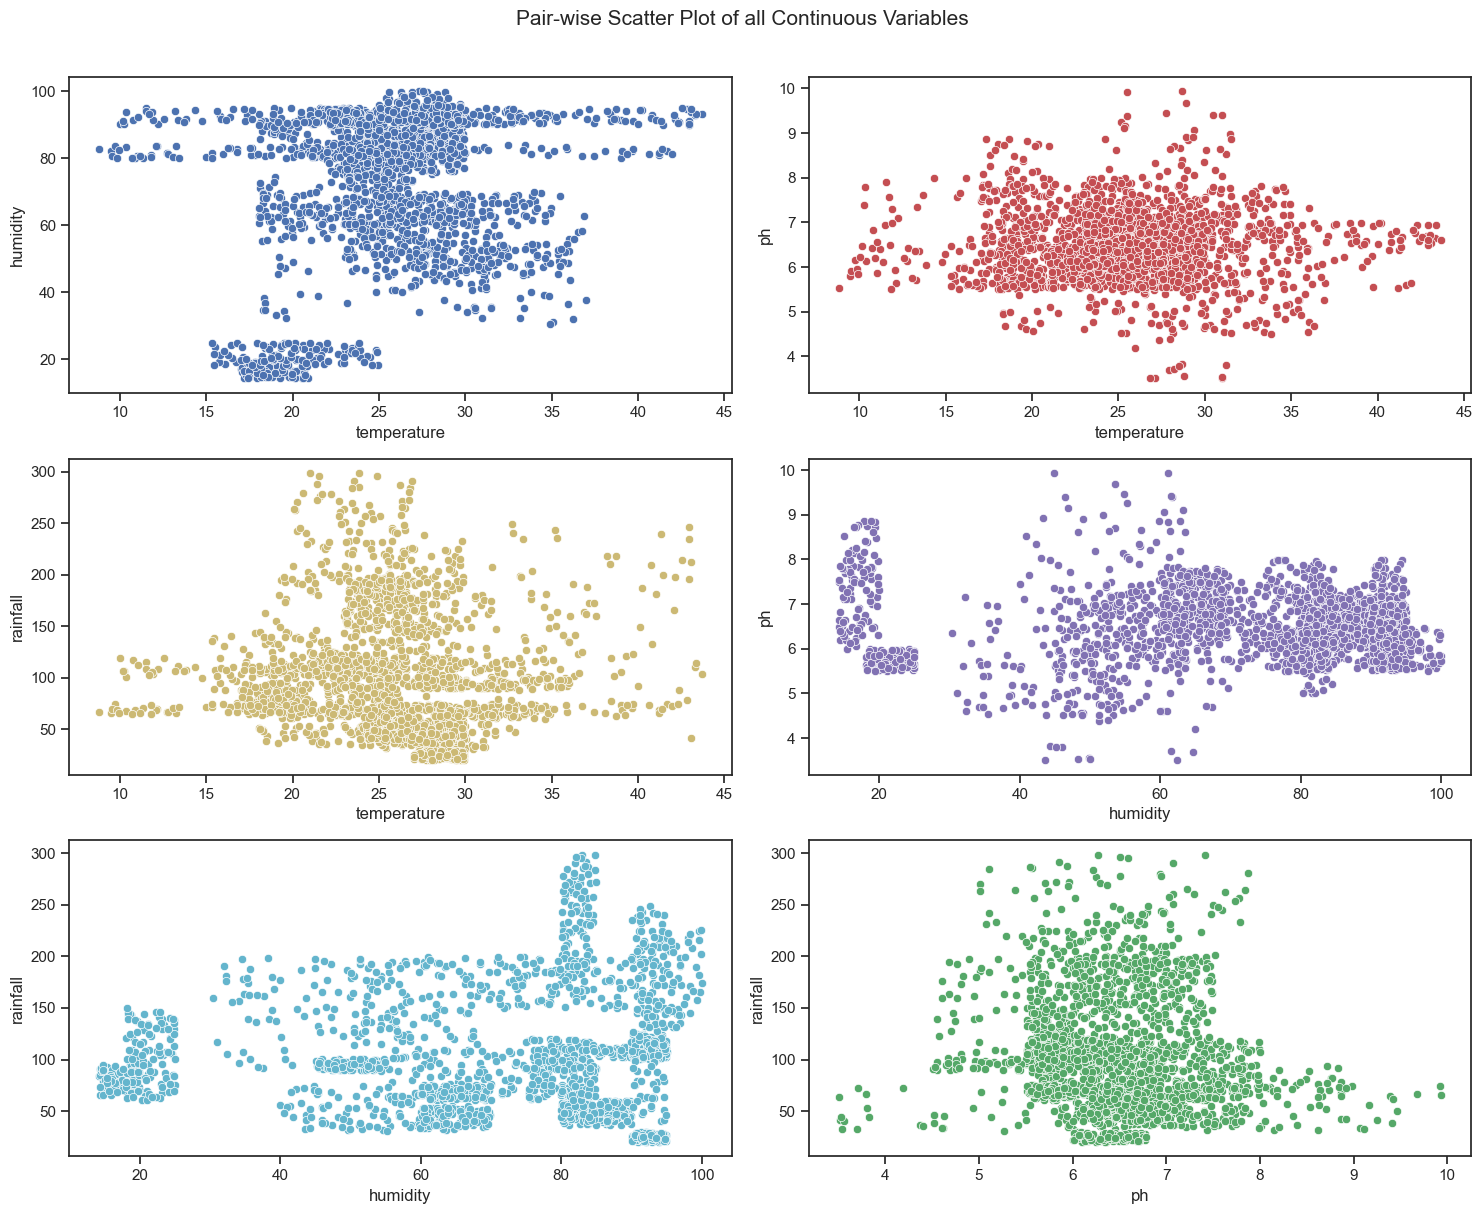

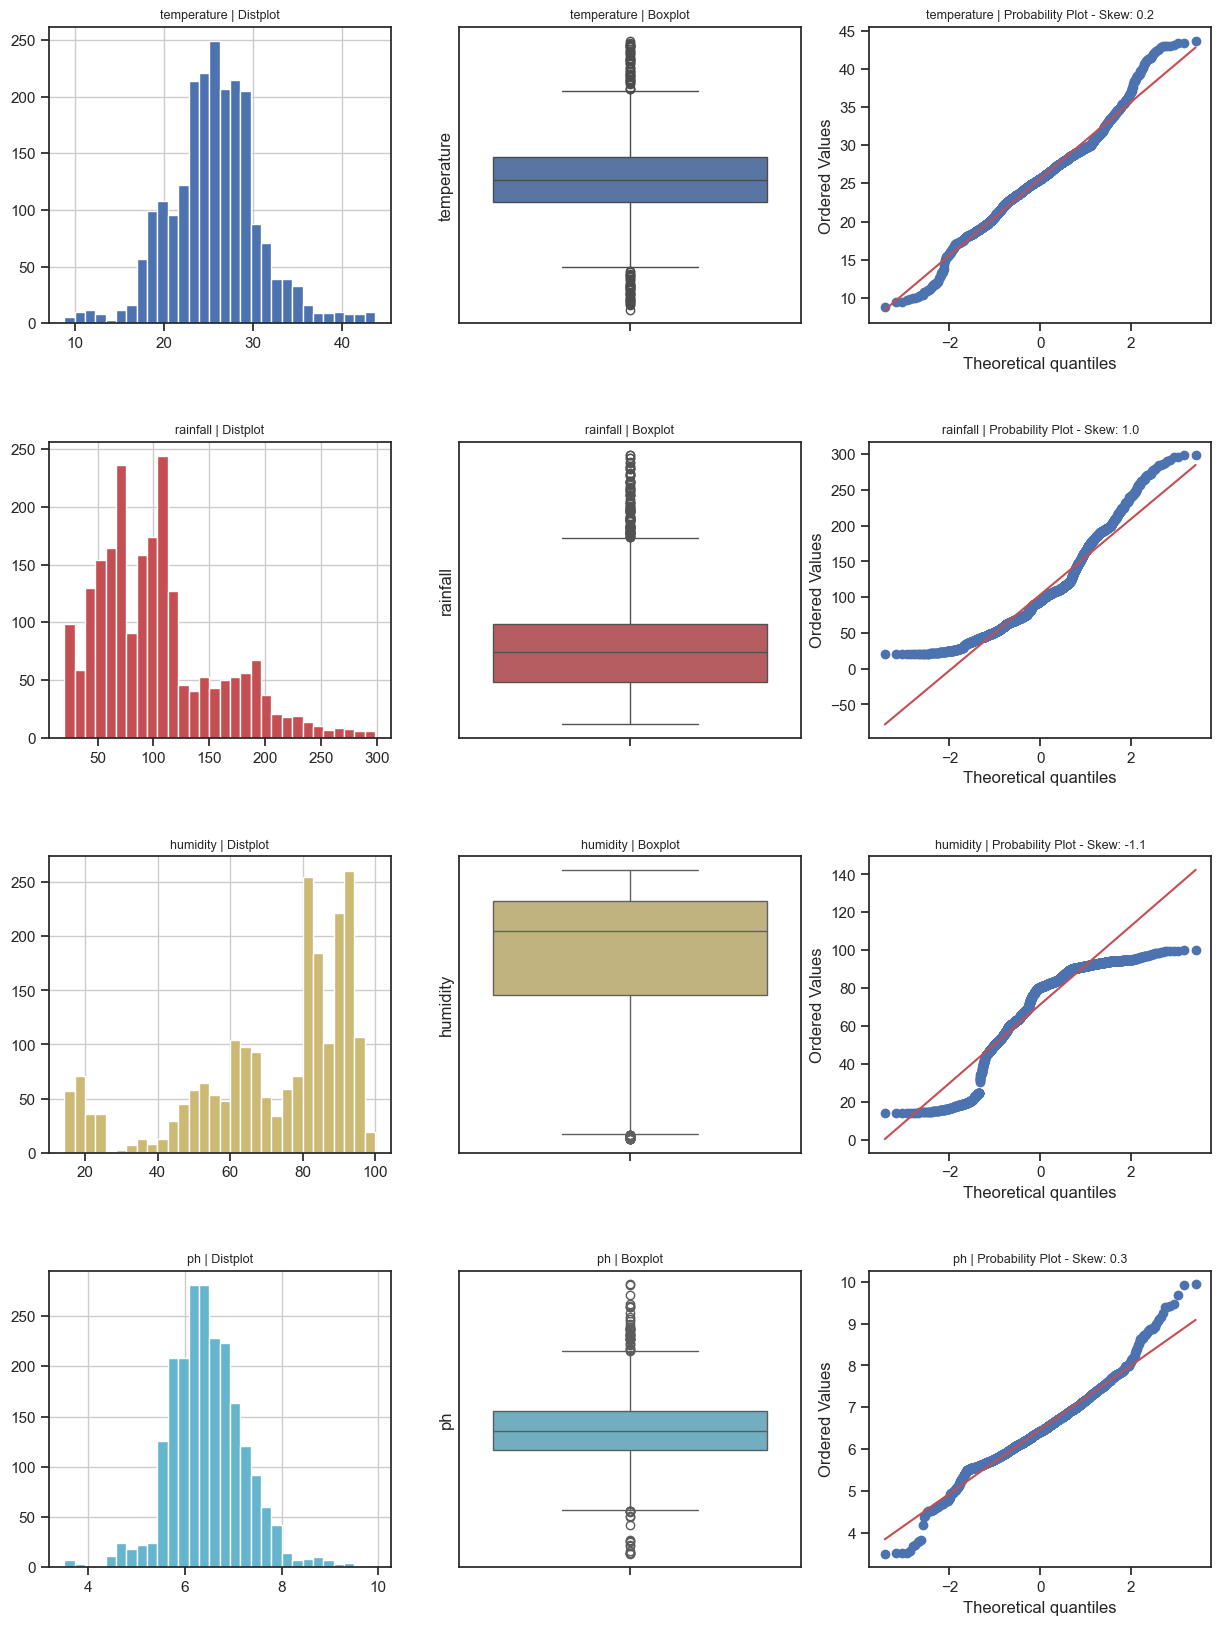

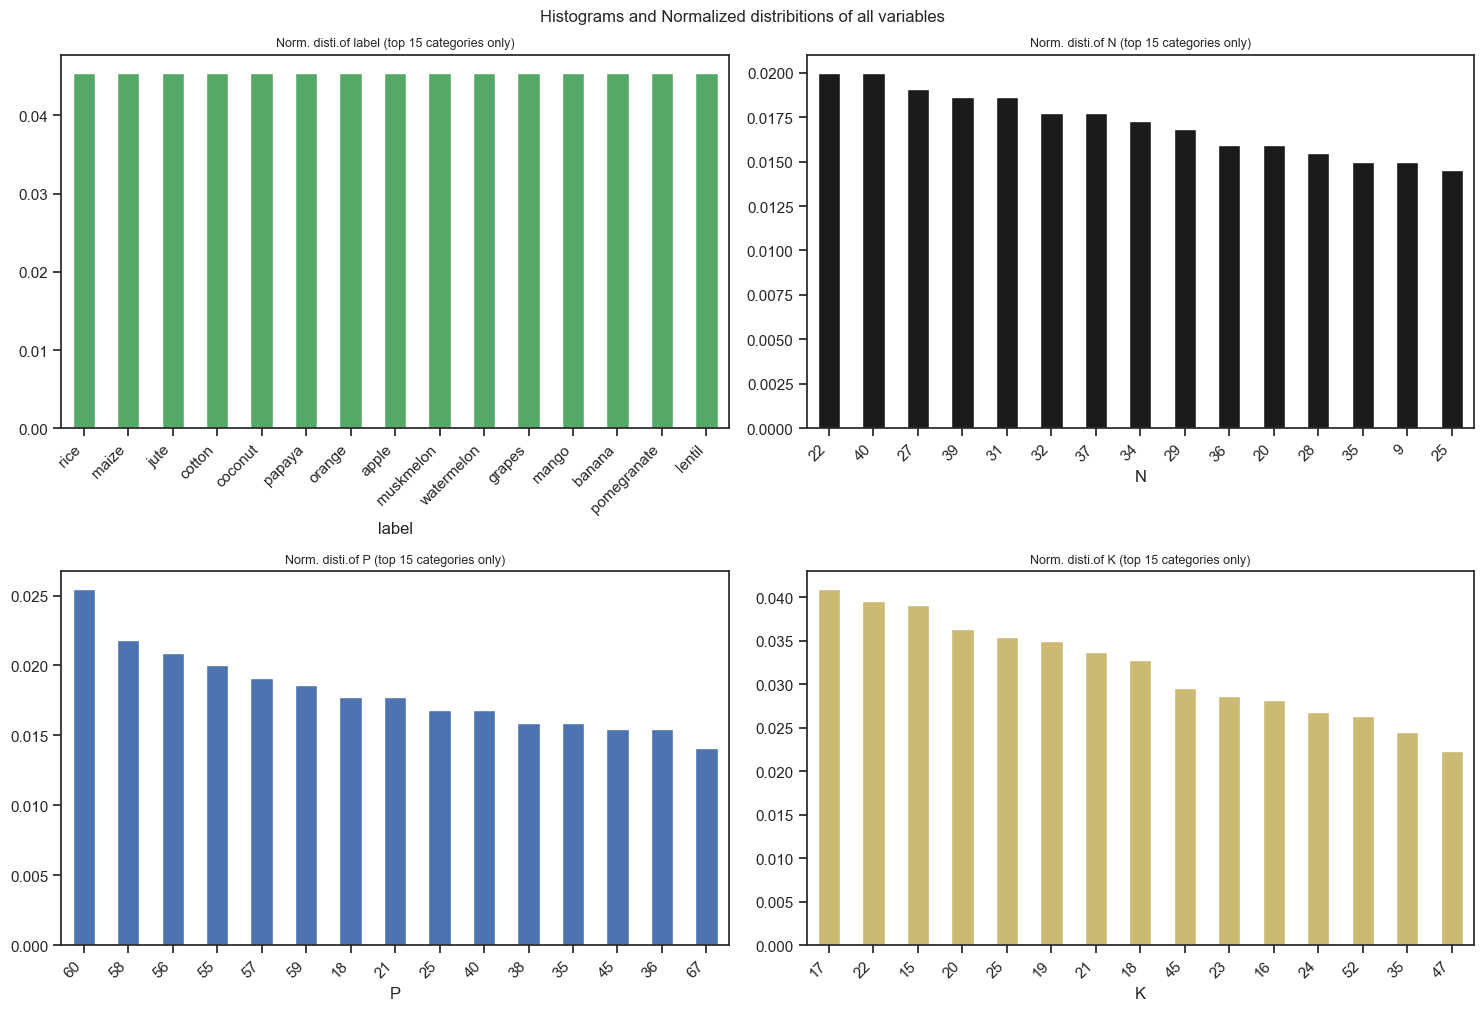

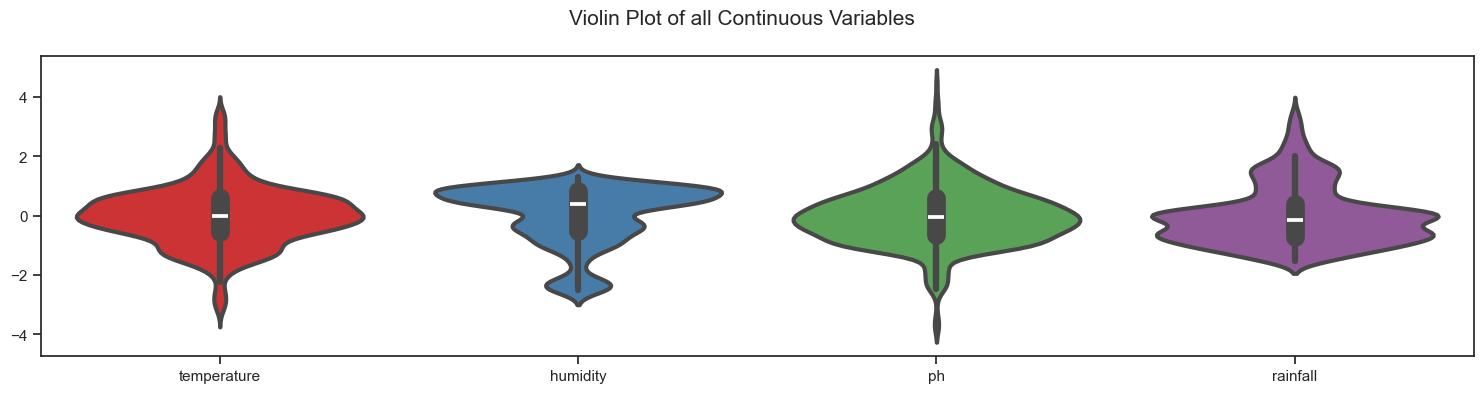

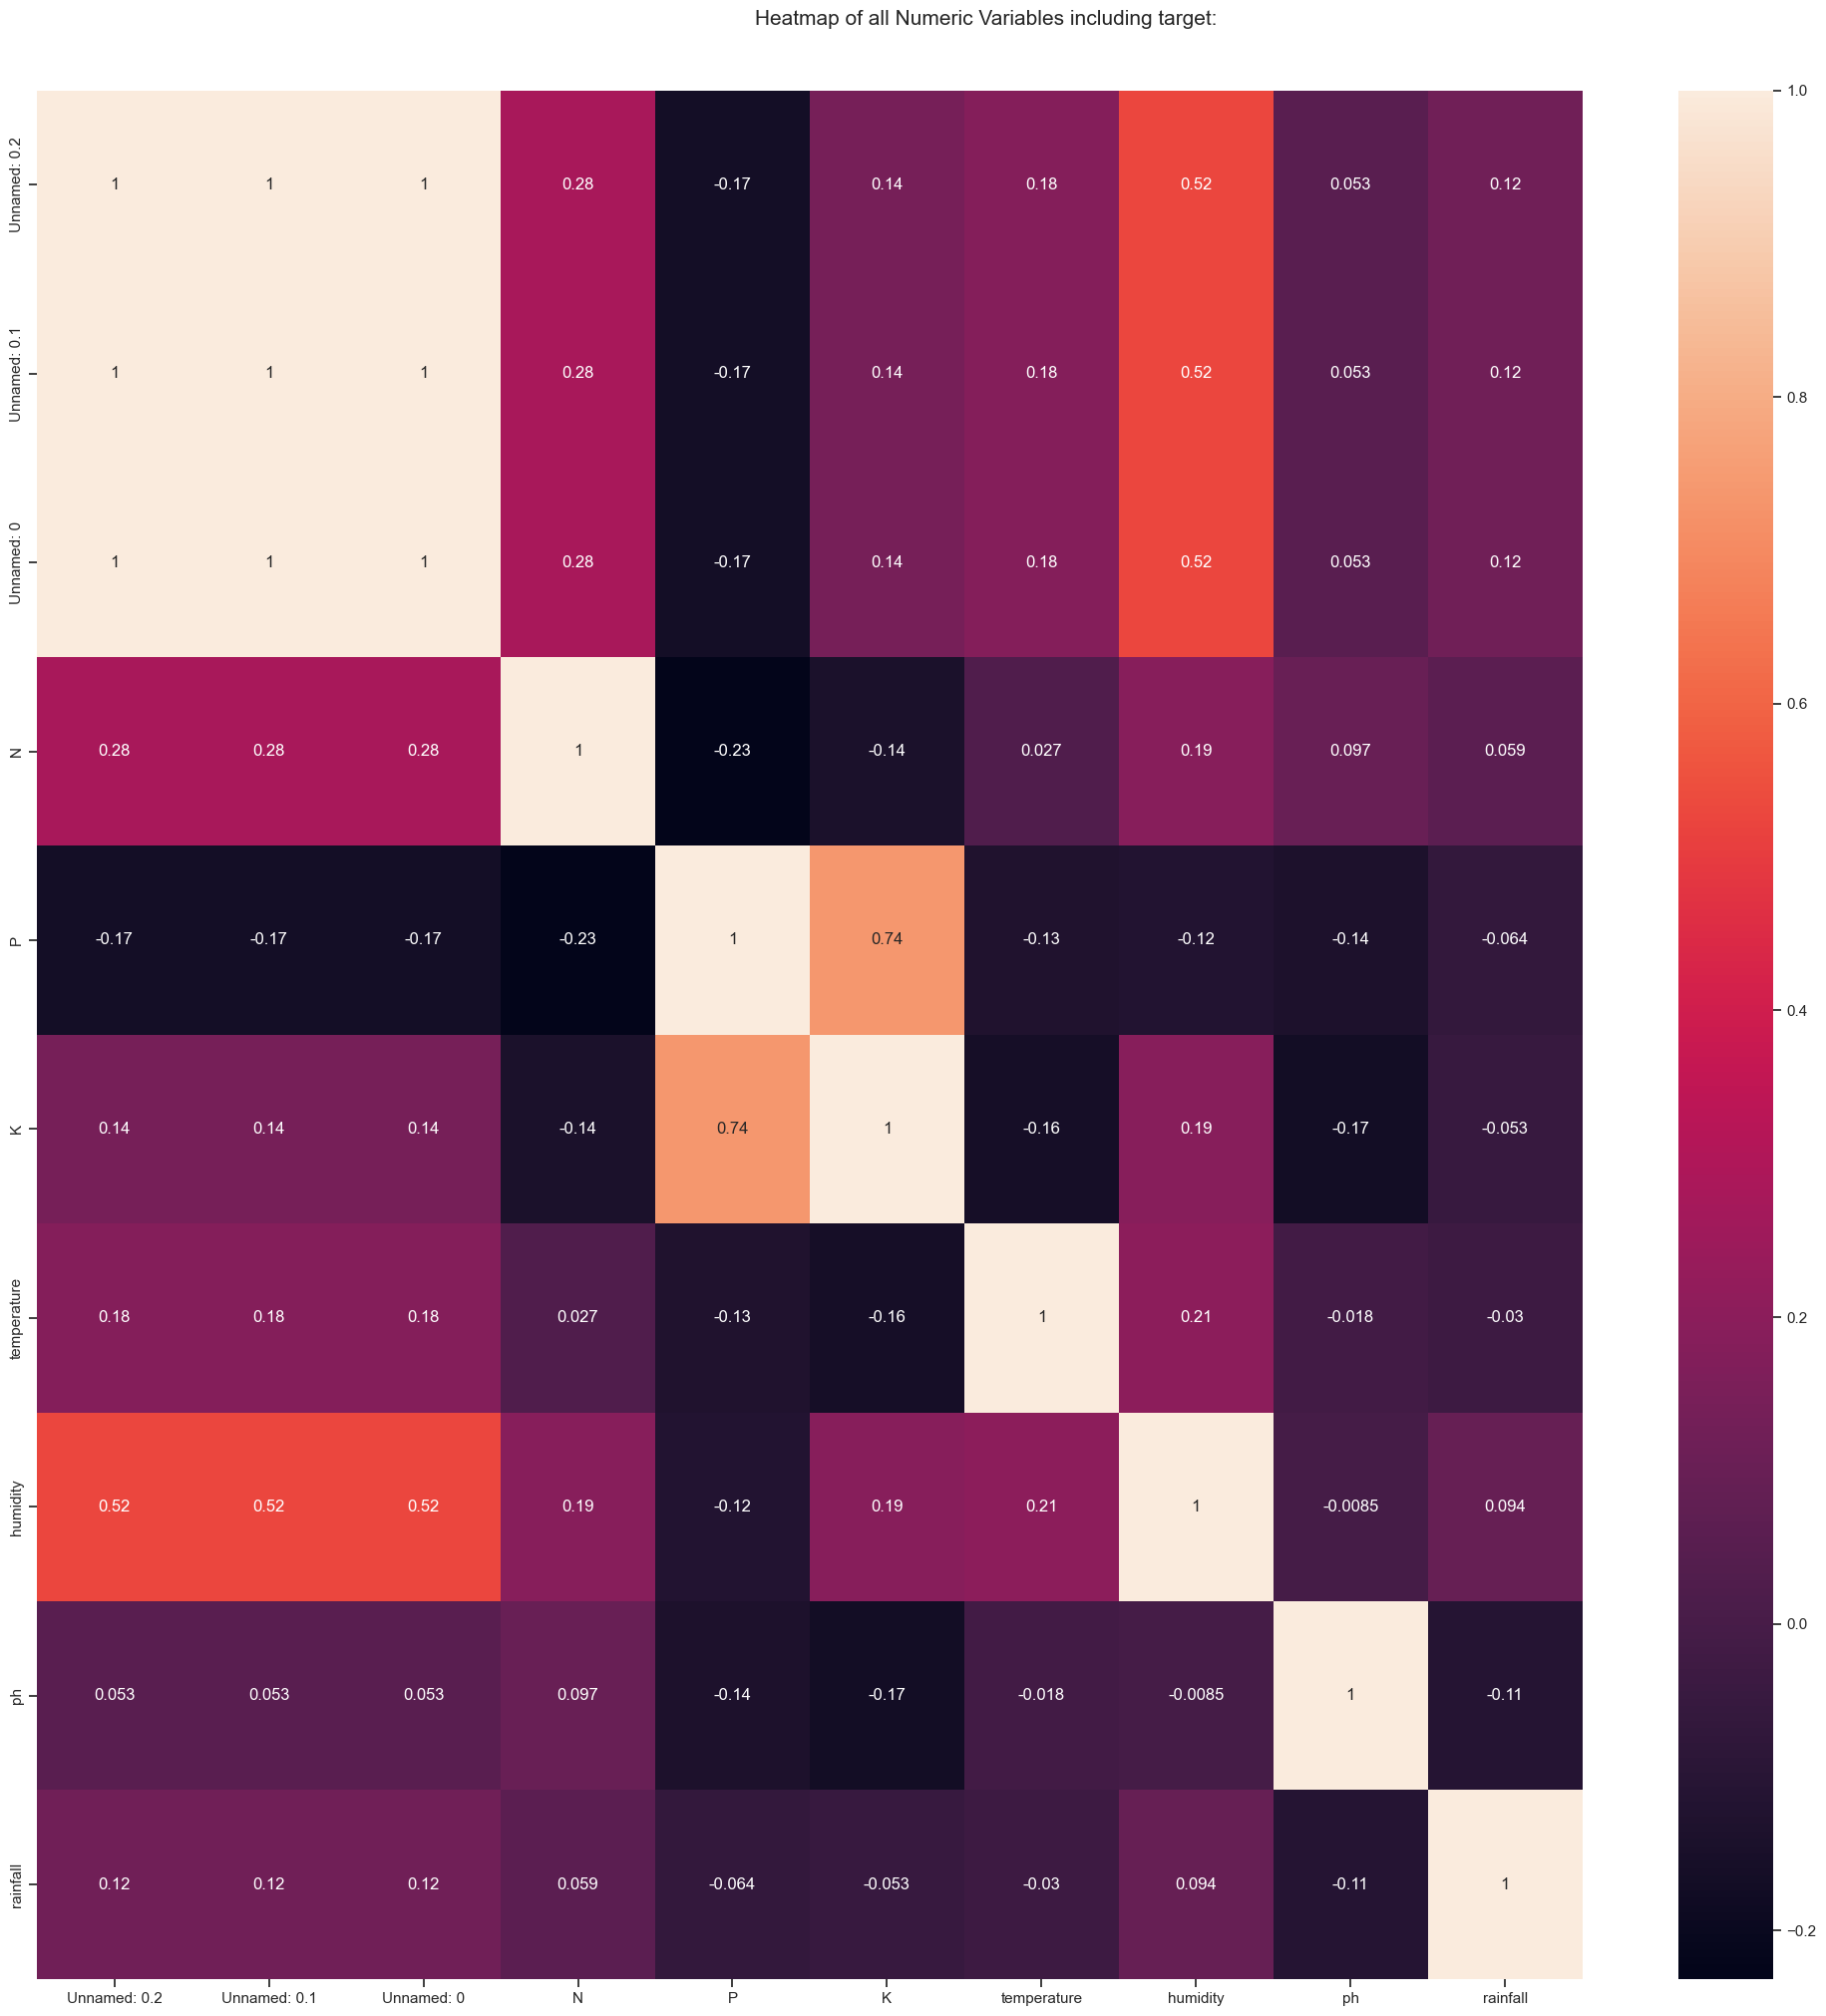

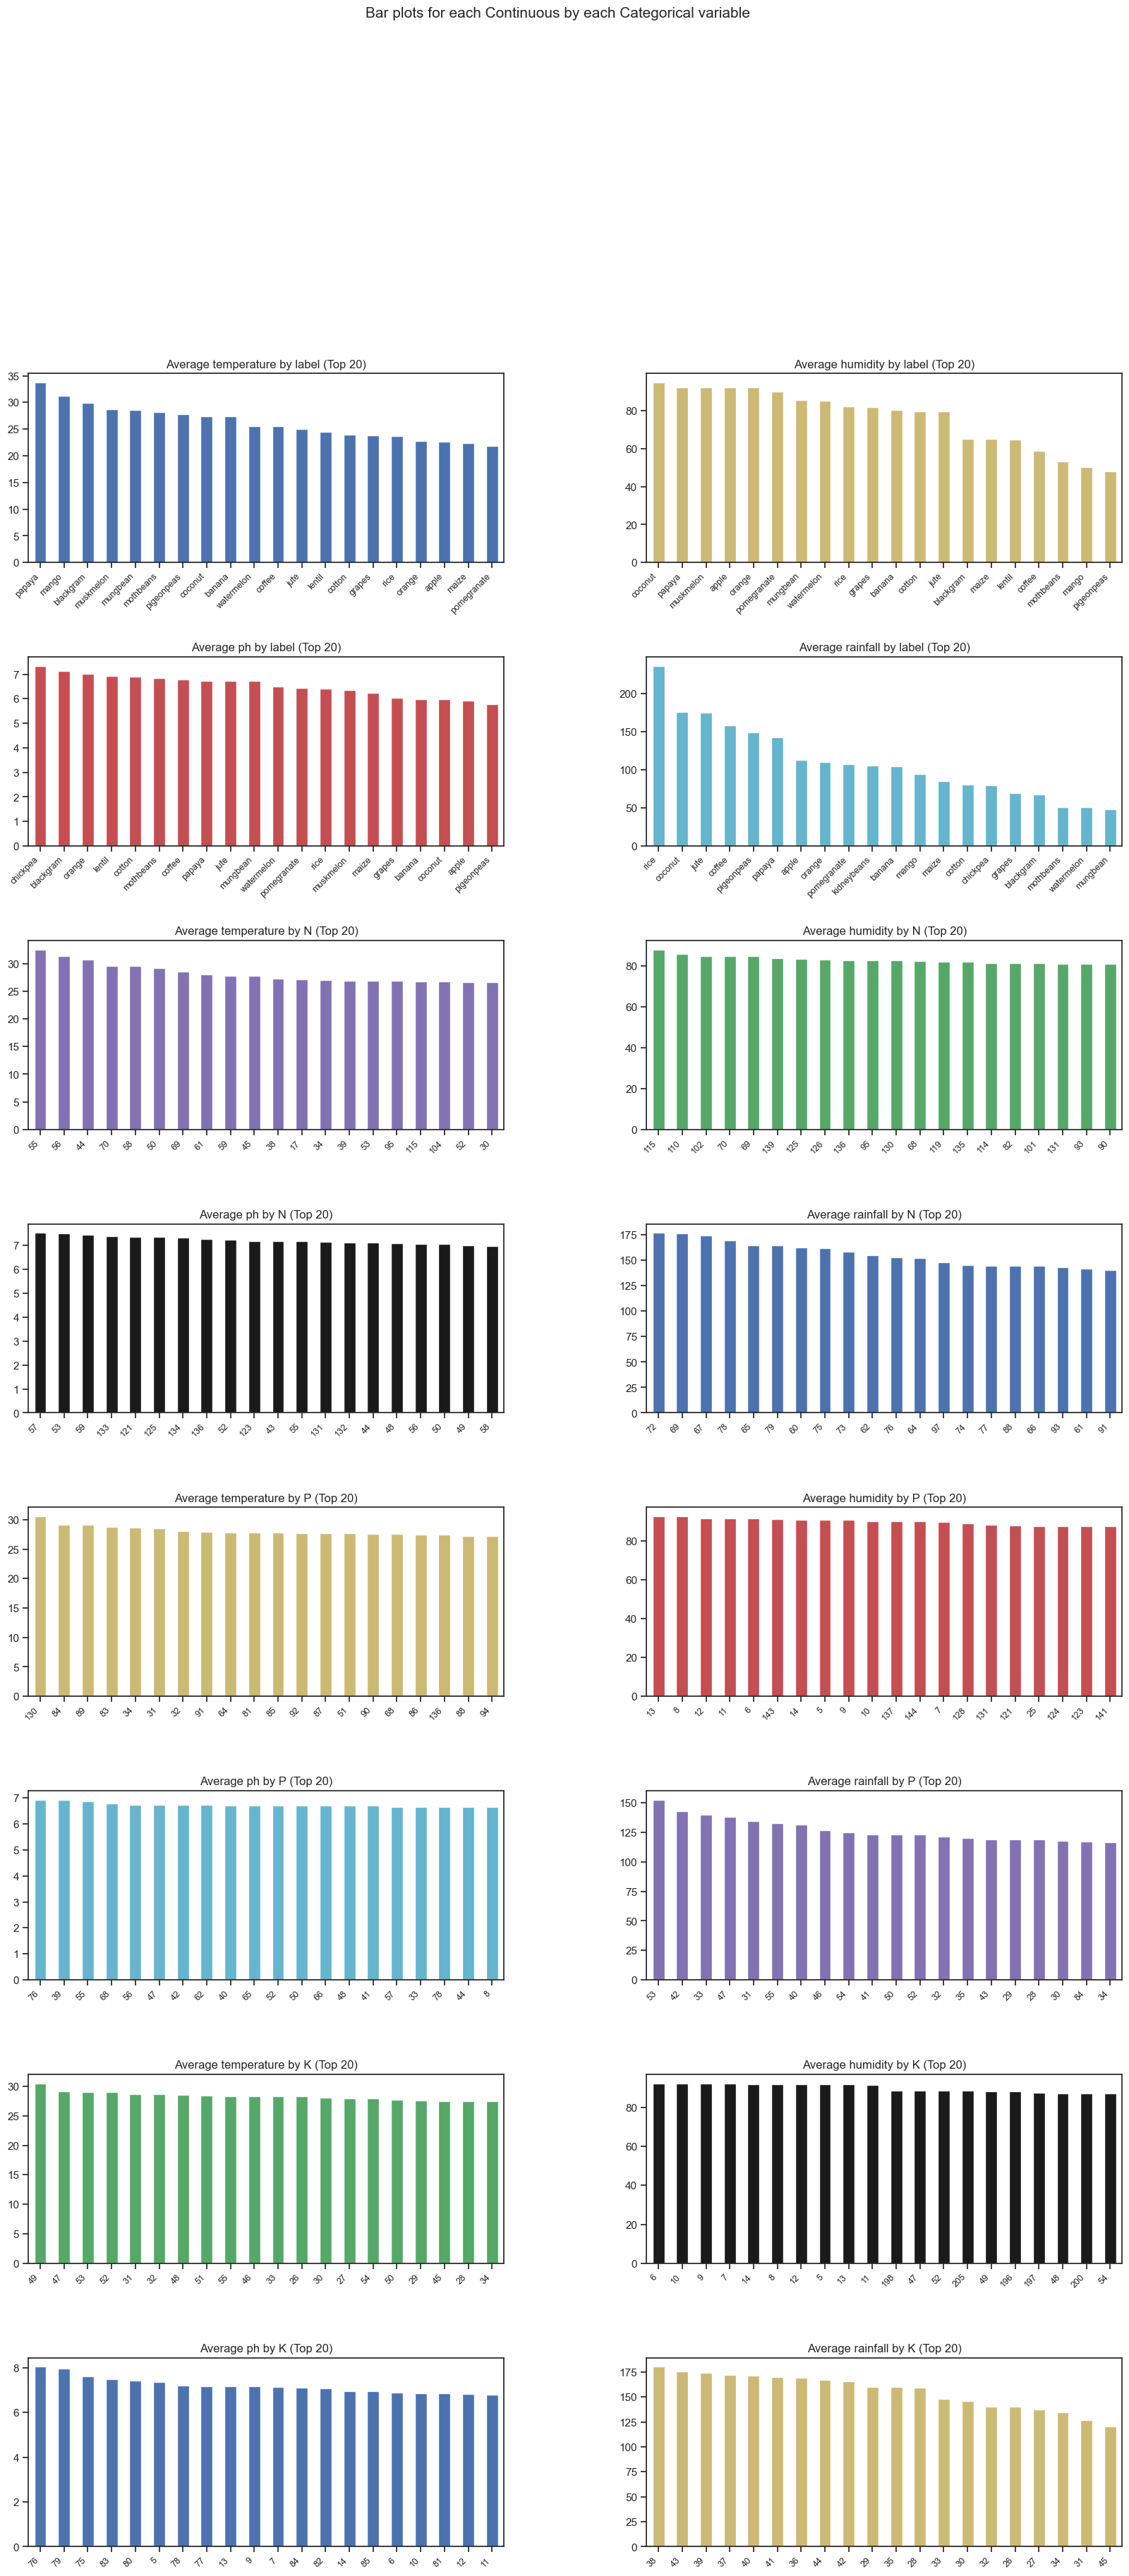

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [18]:
%matplotlib inline 
dft=AV.AutoViz(filename='Crop Recommendation.csv')

#### Seperating features and target label

In [19]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [20]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

#### Splitting the Data into Training data & Test Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Training models

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [26]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

#### Saving trained Decision Tree model


In [27]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

### Guassian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [29]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

#### Saving trained Guassian Naive Bayes model

In [30]:
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

### Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [32]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

#### Saving trained SVM model

In [33]:
import pickle
SVM_pkl_filename = ('SVMClassifier.pkl')
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [35]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

#### Saving trained Logistic Regression model

In [36]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [38]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

#### Saving trained Random Forest model

In [39]:
import pickle
RF_pkl_filename ='RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

#### Accuracy Comparison

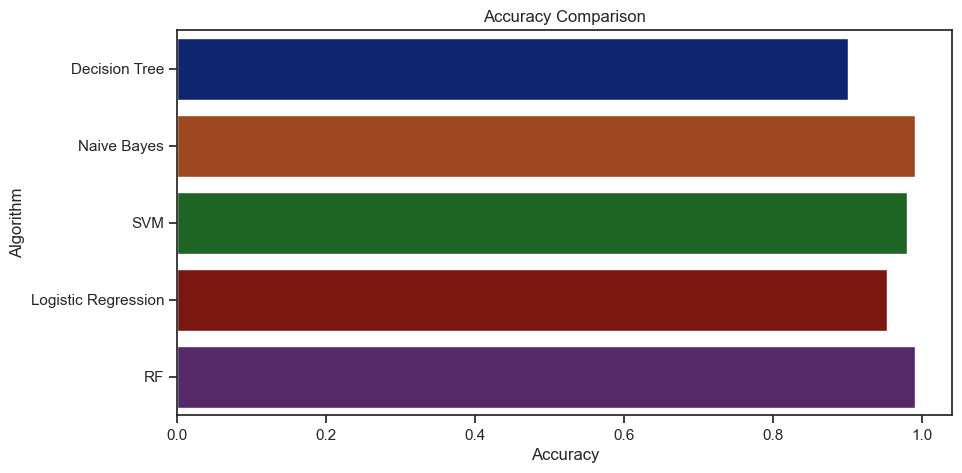

In [40]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
plt.show()

In [41]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


### Making a prediction

In [42]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [43]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [44]:
data = np.array([[24, 65, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']


In [45]:
data= np.array([[12,22,33,78,65.2,6.7,180.5]])
prediction=RF.predict(data)
print(prediction)

['mango']


In [46]:
data= np.array([[50,30,60,78,65.2,7.7,2000.5]])
prediction=RF.predict(data)
print(prediction)

['papaya']
